# 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Import the Dataset

In [2]:
df = pd.read_csv("data_response.csv",index_col=0)

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
10770,10771,Female,42,1,11.0,0,1-2 Year,Yes,48521.0,122.0,206,1
19506,19507,Male,48,1,34.0,0,1-2 Year,Yes,2630.0,156.0,223,1
6228,6229,Male,76,1,28.0,1,1-2 Year,No,29620.0,26.0,69,0
18790,18791,Male,48,1,15.0,0,1-2 Year,Yes,29781.0,26.0,140,1
25390,25391,Male,41,1,46.0,0,1-2 Year,Yes,23826.0,124.0,261,1


In [4]:
df.shape

(10000, 12)

In [5]:
df = df.drop('id',axis=1)

# 3. Check the basic statistics of the whole dataset and give the interpretations

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10770 to 3289
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                10000 non-null  object 
 1   Age                   10000 non-null  int64  
 2   Driving_License       10000 non-null  int64  
 3   Region_Code           10000 non-null  float64
 4   Previously_Insured    10000 non-null  int64  
 5   Vehicle_Age           10000 non-null  object 
 6   Vehicle_Damage        10000 non-null  object 
 7   Annual_Premium        10000 non-null  float64
 8   Policy_Sales_Channel  10000 non-null  float64
 9   Vintage               10000 non-null  int64  
 10  Response              10000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 937.5+ KB


In [7]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.018900,0.998000,26.447800,0.330000,31125.978400,106.871600,154.910000,0.350000
std,14.850555,0.044679,12.719947,0.470236,16975.427752,55.389534,83.716177,0.476993
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,26.000000,1.000000,15.000000,0.000000,24867.250000,26.000000,83.000000,0.000000
50%,39.000000,1.000000,28.000000,0.000000,32234.000000,124.000000,155.000000,0.000000
75%,50.000000,1.000000,34.000000,1.000000,40251.500000,152.000000,227.000000,1.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


# 4. Show the dependent variable (Response) distribution 


<AxesSubplot:xlabel='Response', ylabel='Density'>

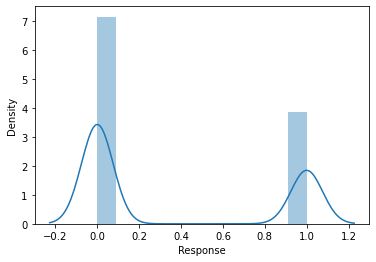

In [8]:
sns.distplot(df["Response"])

In [9]:
df['Annual_Premium'] = df['Annual_Premium'].apply(lambda x: np.log(x) if x != 0 else 0)

<AxesSubplot:xlabel='Annual_Premium'>

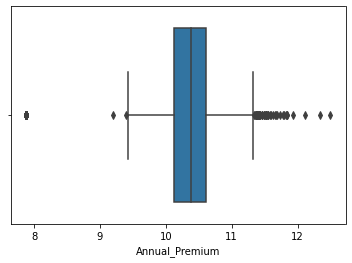

In [10]:
sns.boxplot(df["Annual_Premium"])

# 5. show that how the independent variables are distributed with dependent variable

<AxesSubplot:>

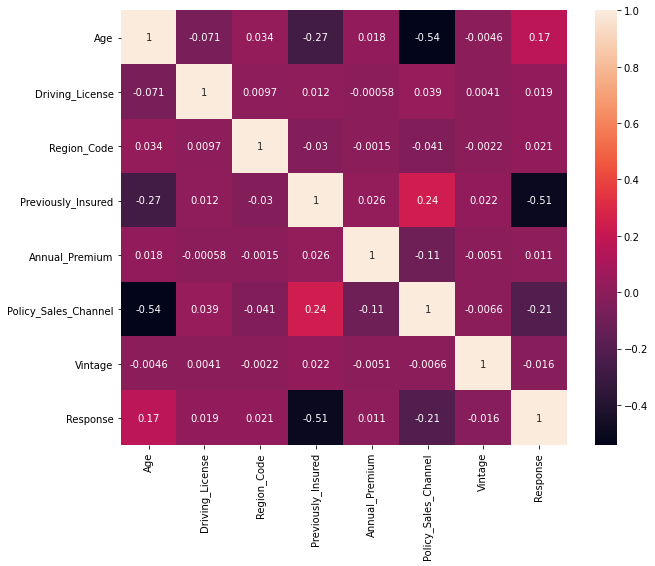

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True)

In [12]:
cat_col = df.loc[:,df.dtypes==np.object]

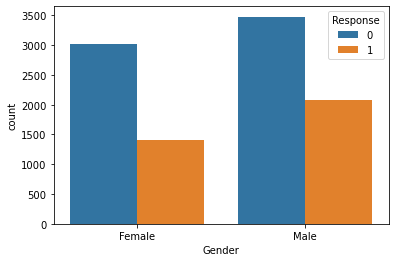

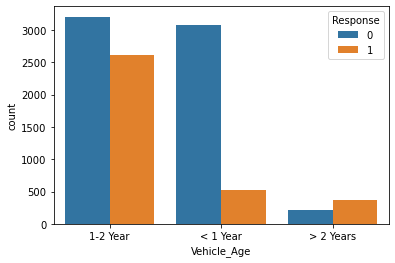

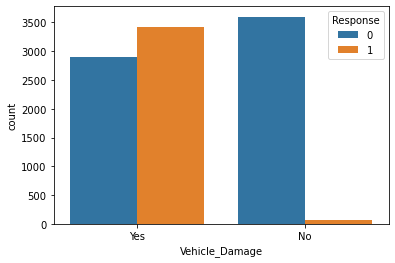

In [13]:
for i in cat_col:
    sns.countplot(df[i],hue= df["Response"])
    plt.show()
    

# 6. Do the required Data Preprocessing


In [14]:
num_col = df.loc[:,~(df.dtypes==np.object)]

In [15]:
df1 = pd.get_dummies(cat_col)

In [16]:
data = pd.concat([num_col, df1], axis=1)

In [17]:
data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
10770,42,1,11.0,0,10.789752,122.0,206,1,1,0,1,0,0,0,1
19506,48,1,34.0,0,7.874739,156.0,223,1,0,1,1,0,0,0,1
6228,76,1,28.0,1,10.296205,26.0,69,0,0,1,1,0,0,1,0
18790,48,1,15.0,0,10.301626,26.0,140,1,0,1,1,0,0,0,1
25390,41,1,46.0,0,10.078533,124.0,261,1,0,1,1,0,0,0,1


# 7. Devide the whole data into X and y


In [18]:
X = data.drop("Response",axis=1)
y = data["Response"]

In [19]:
y

10770    1
19506    1
6228     0
18790    1
25390    1
        ..
8476     1
361      0
3062     1
3302     1
3289     0
Name: Response, Length: 10000, dtype: int64

# 8. split the data into train and test


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# 9. Apply The Logistic Regression Model.


In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,roc_curve,auc
print(accuracy_score (y_test, y_pred))
print(classification_report (y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

# 10.Find best threshold value using Log-Loss


In [22]:
y_pred_proba=logreg.predict_proba(X_test)

In [23]:
y_pred_proba

array([[0.81908924, 0.18091076],
       [0.65272157, 0.34727843],
       [0.5081037 , 0.4918963 ],
       ...,
       [0.35569198, 0.64430802],
       [0.99054661, 0.00945339],
       [0.48991796, 0.51008204]])

In [24]:
y_pred_proba=y_pred_proba[:,1]

In [25]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_proba)

0.4613703421029345

In [26]:
[fpr, tpr, thr] = roc_curve(y_test,y_pred_proba)

In [27]:
log_loss_values=[]
for threshold in thr:
    y_pred_thr=np.where(y_pred_proba>threshold,1,0)
    log_loss_values.append(log_loss(y_test,y_pred_thr))
    
log_loss_df=pd.DataFrame({'Threshold':thr,'log_loss_values':log_loss_values})

In [28]:
log_loss_df1=log_loss_df.sort_values("log_loss_values",ignore_index='True')

In [30]:
optimal_threshold = log_loss_df1['Threshold'][0]

In [31]:
optimal_threshold

0.560924220812999

In [32]:
optimal_y_pred=np.where(y_pred_proba>optimal_threshold,1,0)

# 11. Find The Classification Metrics and Give observations


In [33]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
confusion_matrix(y_test,optimal_y_pred)

array([[1024,  273],
       [ 255,  448]], dtype=int64)

In [34]:
accuracy_score(y_test,optimal_y_pred)

0.736

In [35]:
classification_report (y_test,optimal_y_pred)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1297
           1       0.62      0.64      0.63       703

    accuracy                           0.74      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.74      0.74      0.74      2000



# SMOTE

In [40]:
#pip install imblearn

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE()

In [43]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [44]:
from collections import Counter
print("Before :",Counter(y_train))
print("After :",Counter(y_train_res))

Before : Counter({0: 5203, 1: 2797})
After : Counter({1: 5203, 0: 5203})


In [45]:
logreg.fit(X_train_res, y_train_res)
y_pred_smote = logreg.predict(X_test)

In [46]:
print(accuracy_score (y_test, y_pred_smote))
print(classification_report (y_test, y_pred_smote))

0.7125
              precision    recall  f1-score   support

           0       0.88      0.65      0.74      1297
           1       0.56      0.83      0.67       703

    accuracy                           0.71      2000
   macro avg       0.72      0.74      0.71      2000
weighted avg       0.77      0.71      0.72      2000



In [47]:
confusion_matrix(y_test,y_pred_smote)

array([[839, 458],
       [117, 586]], dtype=int64)

# Hyperparamater Tunning using Gridsearch CV

In [48]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_res,y_train_res)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}


In [49]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(X_train_res,y_train_res)
y_pred1 = logreg2.predict(X_test)
print(accuracy_score (y_test, y_pred1))

0.733


In [50]:
confusion_matrix(y_test,y_pred1)

array([[849, 448],
       [ 86, 617]], dtype=int64)

In [51]:
print(classification_report (y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1297
           1       0.58      0.88      0.70       703

    accuracy                           0.73      2000
   macro avg       0.74      0.77      0.73      2000
weighted avg       0.79      0.73      0.74      2000



# 12. Apply Decision Tree model

In [53]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
y_pred_tree=clf.predict(X_test)
confusion_matrix(y_test,y_pred_tree)
accuracy_score(y_test,y_pred_tree)

0.7475

# 13. Find The Classification Metrics and Give observations

In [54]:
confusion_matrix(y_test,y_pred_tree)

array([[935, 362],
       [143, 560]], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred_tree)

0.7475

# comparing models using Area under curve

In [ ]:
[fpr, tpr, thr] = roc_curve(y_test,y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.title("Logistic Regression")
plt.legend(loc='lower right')
plt.show()

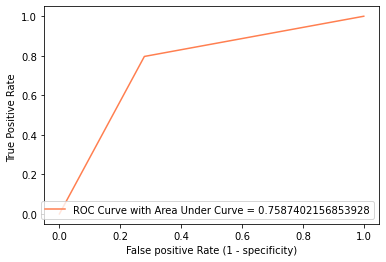

In [57]:
[fpr, tpr, thr] = roc_curve(y_test,y_pred_tree)
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

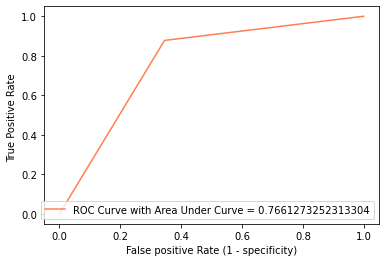

In [59]:
[fpr, tpr, thr] = roc_curve(y_test,y_pred1)
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.title("Logistic Regression SMOTE")
plt.legend(loc='lower right')
plt.show()

# Visualization of Tree

In [61]:
selected_features=['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes']

In [62]:
#pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [63]:
#pip install graphviz

In [64]:
#pip install python-graphviz
import graphviz

In [65]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


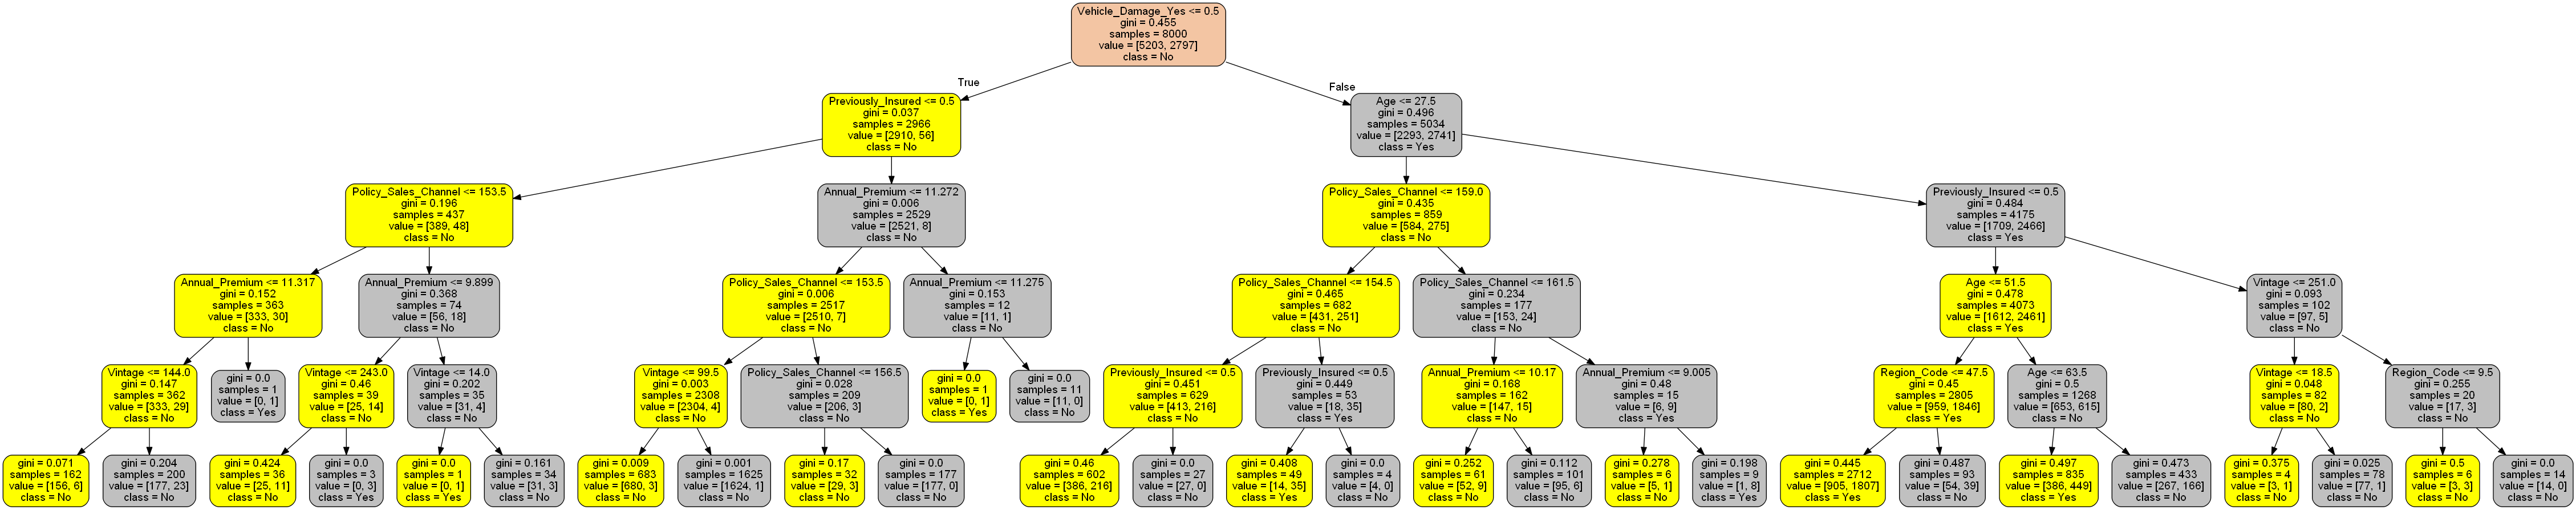

In [67]:
import collections
dot_data = export_graphviz(clf, feature_names= selected_features, filled=True, rounded=True, class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data)  

colors = ('yellow', 'grey')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
plt.show()
Image(graph.create_png())